In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import datetime as dt
from tqdm import tqdm

## dataset 

In [2]:
train_set = pd.read_csv('final_dataset.csv' , index_col = 0 )
test_set = pd.read_csv('testdata_210911.csv')   #prophet

In [3]:
test_set['year'] = pd.to_datetime(test_set.base_date).dt.year
test_set['month'] = pd.to_datetime(test_set.base_date).dt.month
test_set['date'] = pd.to_datetime(test_set.base_date).dt.day

In [4]:
test_set =test_set[['year', 'month', 'date','emd_nm', 'card_use_cnt', 'delivery_per_cnt',
       'market_per_cnt', 'visit_ratio', 'frgn_ratio', 'youth_ratio',
       'total_pop', '제주_resd_ratio', '제주_resd_pop']]

### 건입동

In [5]:
i = train_set.emd_nm.unique()[0]

In [22]:
# 데이터셋 feature/train으로 분리 후 train/test셋으로 분리하기

# for i in train_set.emd_nm.unique() :
data = train_set[train_set.emd_nm == i]
test_data = test_set[test_set.emd_nm == i]

feature_df = data.drop(['em_g','emd_nm'],axis =1)
X_test= test_data.drop( 'emd_nm', axis =1)
target_df = data[['em_g']]

# train/ valid로 분할
X_train, X_valid, y_train, y_valid = train_test_split(feature_df, target_df, test_size = 0.3, random_state = 45)


In [23]:
# 독립변수 scaling

def scaliing(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    dataframe_scaled= pd.DataFrame(data_scaled, index = data.index , columns = data.columns)
    
    return dataframe_scaled, scaler

X_train_scaled, X_train_scaler = scaliing(X_train)
X_valid_scaled = pd.DataFrame(X_train_scaler.transform(X_valid), index = X_valid.index, columns = X_valid.columns)
#X_test

In [24]:
# 선형회귀 모델 구축

lr = LinearRegression().fit(X_train_scaled, y_train)

print("train set score: ", lr.score(X_train_scaled, y_train))
print("valid set score: ", lr.score(X_valid_scaled, y_valid))

train set score:  0.7310126590550627
valid set score:  0.6352453674331645


In [28]:
# Ordinary Least Sqaure regression
def ols(train_x, train_y, valid_x, valid_y):
    linreg = LinearRegression(n_jobs=-1)
    linreg_fit = linreg.fit(train_x, train_y)
    pred = linreg.predict(valid_x)
    
    r_squared = linreg.score(train_x, train_y)
    valid_set_score = linreg.score(valid_x, valid_y)
    rmse = np.sqrt(np.mean((pred-valid_y).values**2))
    
    return pred, r_squared, valid_set_score , rmse, linreg

valid_pred_y, train_r_squared, valid_set_score,  rmse , linreg = ols(X_train_scaled, y_train, X_valid_scaled, y_valid)

In [29]:
# OLS result
print('R squared :', train_r_squared)
print('Valid set score : ' , valid_set_score)
print('RMSE :', rmse)

R squared : 0.7310126590550627
Valid set score :  0.6352453674331645
RMSE : 124816.24673748881


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


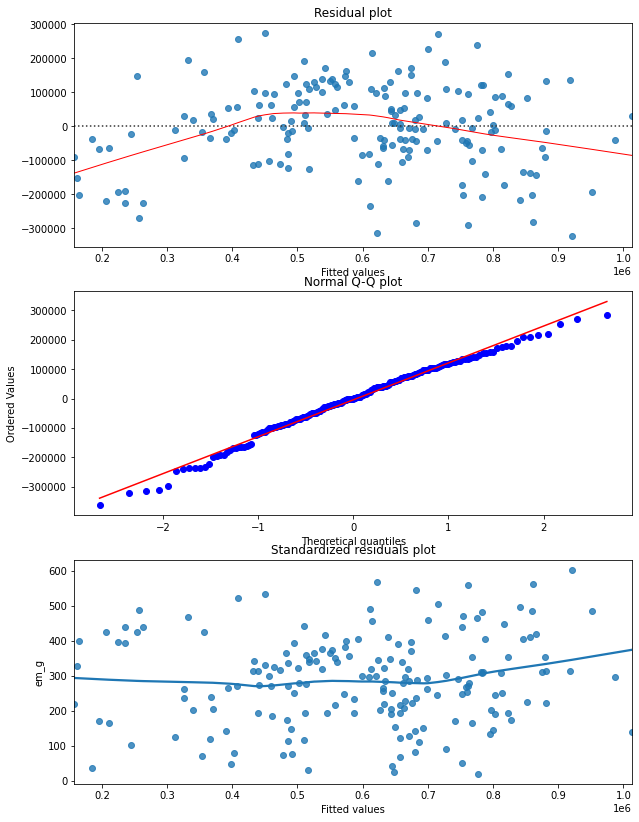

In [27]:
# plot

def plot_resd_assump(y_valid_pred , y_valid): 
     
        plt.figure(figsize = (10,14))

        plt.subplot(3,1,1)
        sns.residplot(y_valid_pred.reshape(-1), y_valid.values.reshape(-1), lowess = True , 
                      line_kws={'color':'red' , 'lw': 1, 'alpha':1})
        plt.xlabel('Fitted values')
        plt.title('Residual plot')

        residual = y_valid.iloc[:,0] - y_valid_pred.reshape(-1)

        plt.subplot(3,1,2)
        stats.probplot(residual, dist='norm', plot=plt)
        plt.title('Normal Q-Q plot')


        standardized_residual = np.sqrt(np.abs(residual))

        plt.subplot(3,1,3)
        sns.regplot(y_valid_pred.reshape(-1) , standardized_residual, scatter = True, lowess = True)
        plt.xlabel('Fitted values')
        plt.title('Standardized residuals plot')

        plt.show()
        
plot_resd_assump(valid_pred_y, y_valid)

### 모든 동

  0%|                                                                                           | 0/42 [00:00<?, ?it/s]c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------------------------------
건입동
R squared : 0.4526856725693339
Valid set score :  0.3983084851467844
RMSE : 208194.43614863456


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


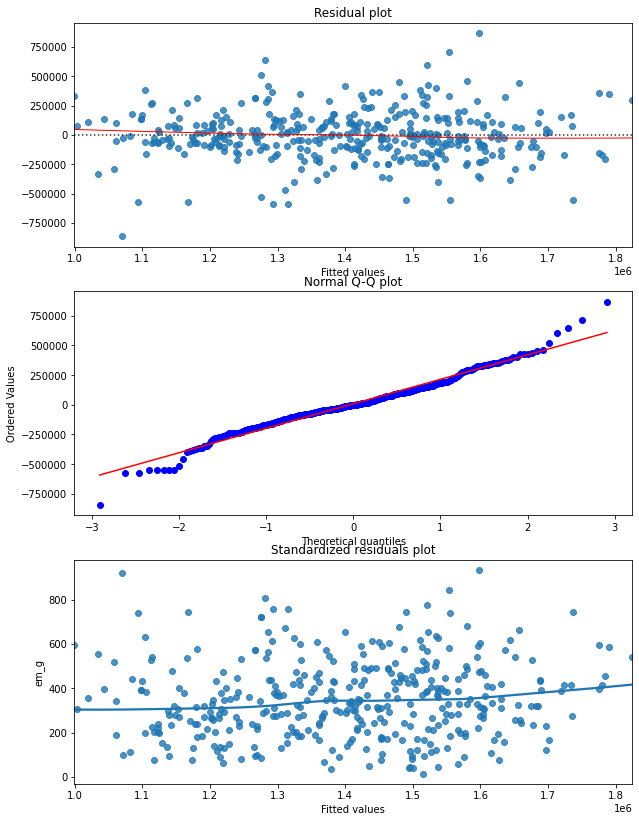

  2%|█▉                                                                                 | 1/42 [00:00<00:31,  1.29it/s]

--------------------------------------------------
------------------------------------
남원읍
R squared : 0.37551943224268924
Valid set score :  0.35853595143706707
RMSE : 384622.37764066487


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


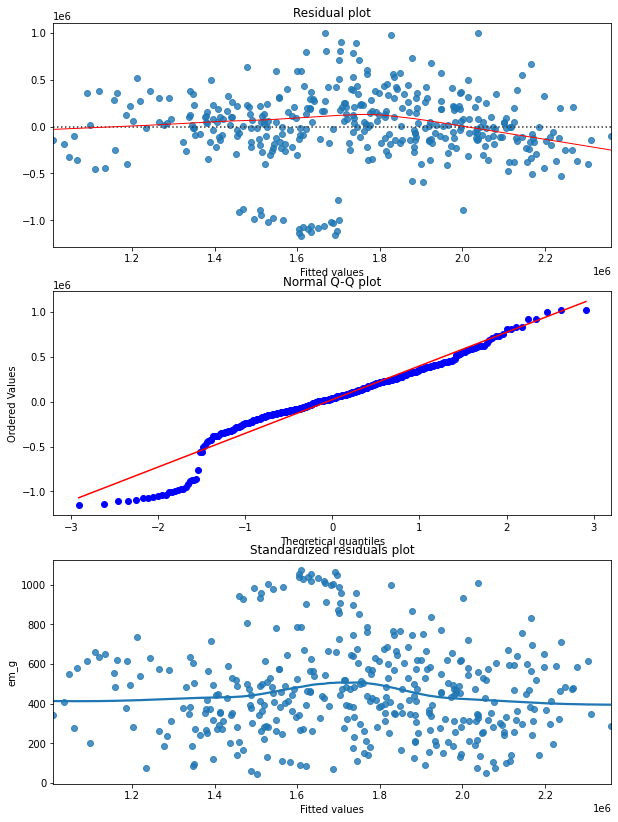

  5%|███▉                                                                               | 2/42 [00:01<00:28,  1.40it/s]

--------------------------------------------------
------------------------------------
노형동
R squared : 0.3753635314753766
Valid set score :  0.2972053798224694
RMSE : 1091991.6931546126


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


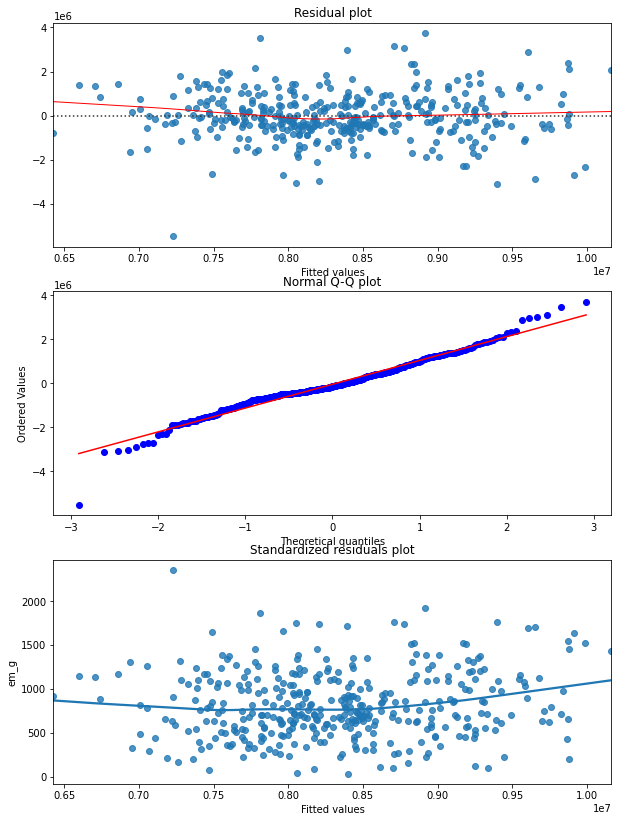

  7%|█████▉                                                                             | 3/42 [00:02<00:27,  1.44it/s]

--------------------------------------------------
------------------------------------
대륜동
R squared : 0.2557261509787697
Valid set score :  0.1962940177070066
RMSE : 284033.6032697132


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


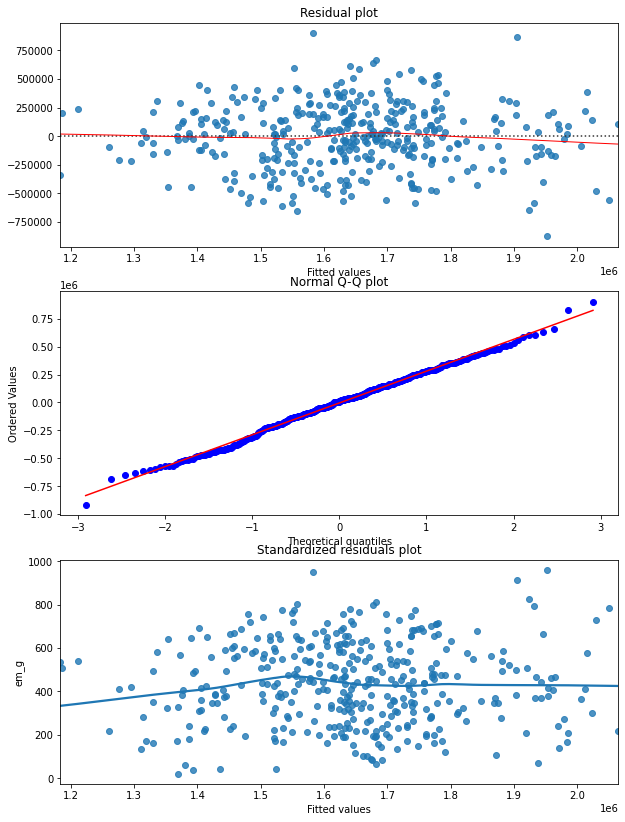

 10%|███████▉                                                                           | 4/42 [00:02<00:26,  1.44it/s]

--------------------------------------------------
------------------------------------
대정읍
R squared : 0.7571611528956899
Valid set score :  0.7636310051805344
RMSE : 446013.6108730013


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


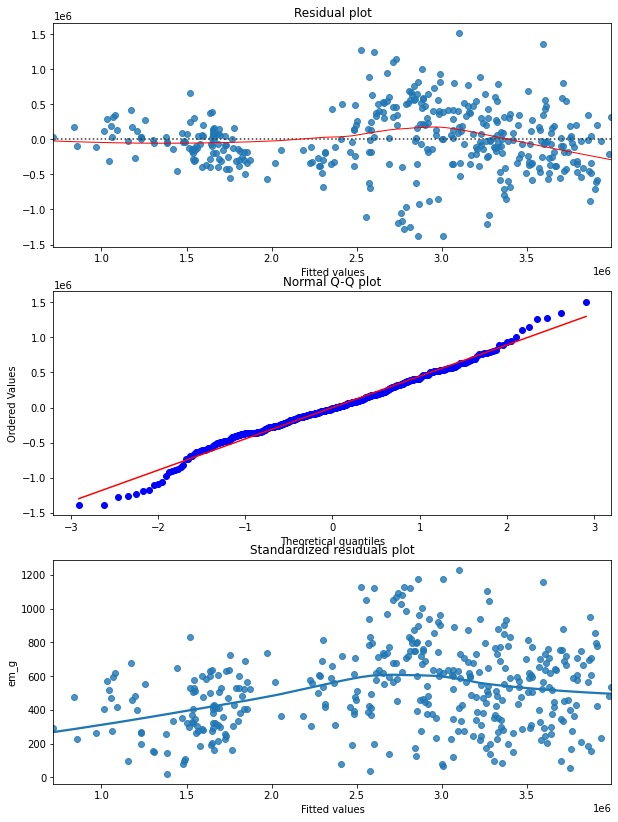

 12%|█████████▉                                                                         | 5/42 [00:03<00:25,  1.45it/s]

--------------------------------------------------
------------------------------------
대천동
R squared : 0.4144816163858669
Valid set score :  0.3959092535513481
RMSE : 280733.9412112987


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


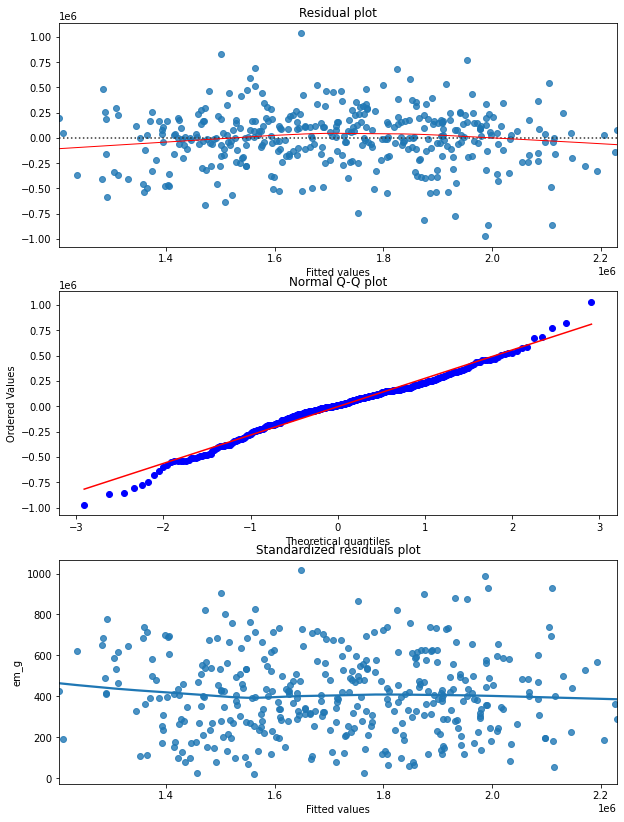

 14%|███████████▊                                                                       | 6/42 [00:04<00:24,  1.46it/s]

--------------------------------------------------
------------------------------------
도두동
R squared : 0.4341540002694192
Valid set score :  0.42449766108751585
RMSE : 108192.44592374905


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


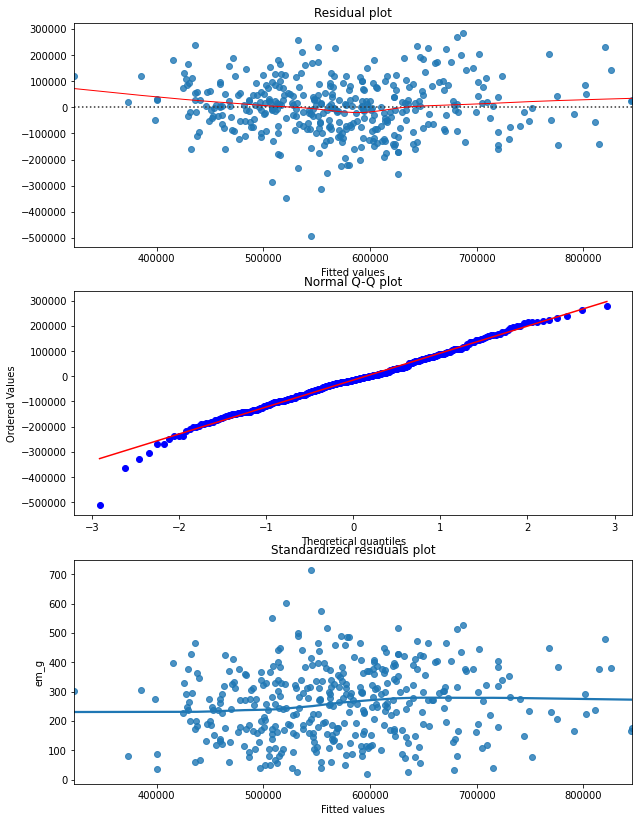

 17%|█████████████▊                                                                     | 7/42 [00:04<00:23,  1.46it/s]

--------------------------------------------------
------------------------------------
동홍동
R squared : 0.2261252633106614
Valid set score :  0.1858110451079522
RMSE : 761370.7254548116


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


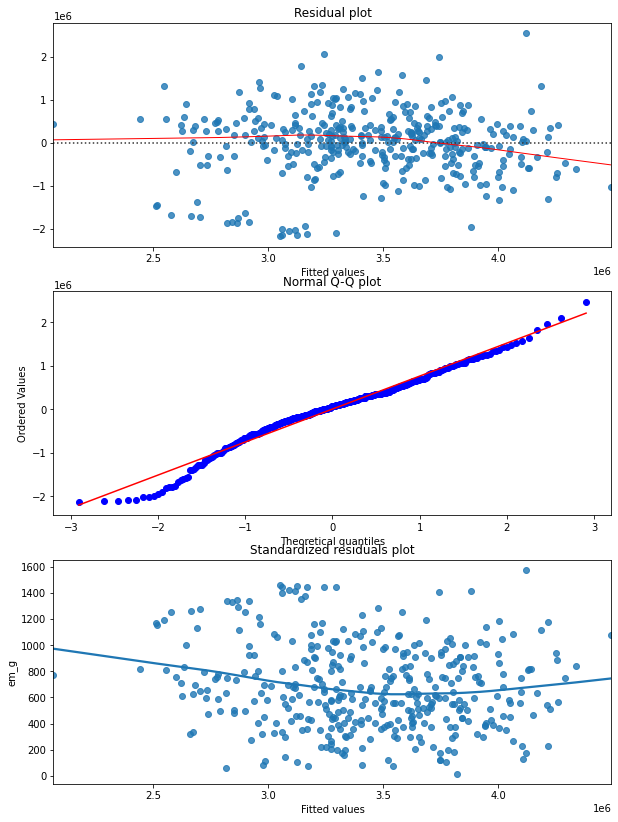

 19%|███████████████▊                                                                   | 8/42 [00:05<00:23,  1.48it/s]

--------------------------------------------------
------------------------------------
봉개동
R squared : 0.4258400094610171
Valid set score :  0.3411488858622529
RMSE : 91553.94474230944


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


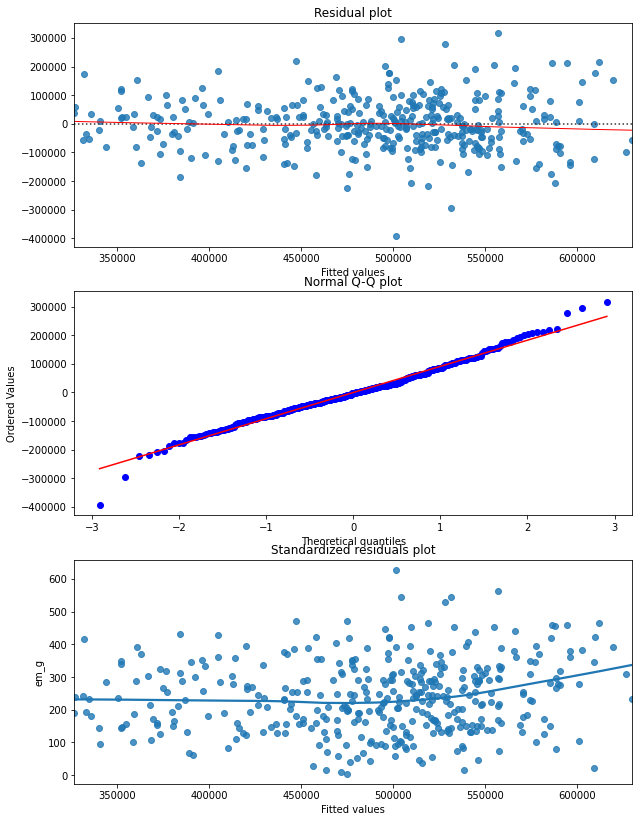

 21%|█████████████████▊                                                                 | 9/42 [00:06<00:22,  1.48it/s]

--------------------------------------------------
------------------------------------
삼도1동
R squared : 0.49719563023805613
Valid set score :  0.39589725363578876
RMSE : 324799.6149287034


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


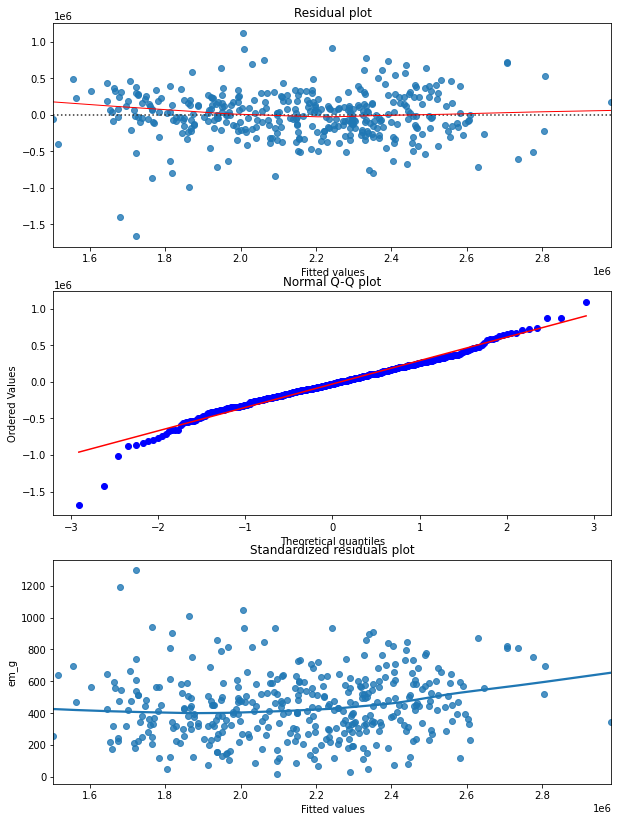

 24%|███████████████████▌                                                              | 10/42 [00:08<00:37,  1.17s/it]

--------------------------------------------------
------------------------------------
삼도2동
R squared : 0.6019456793127209
Valid set score :  0.5426399632085424
RMSE : 182474.20500560963


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


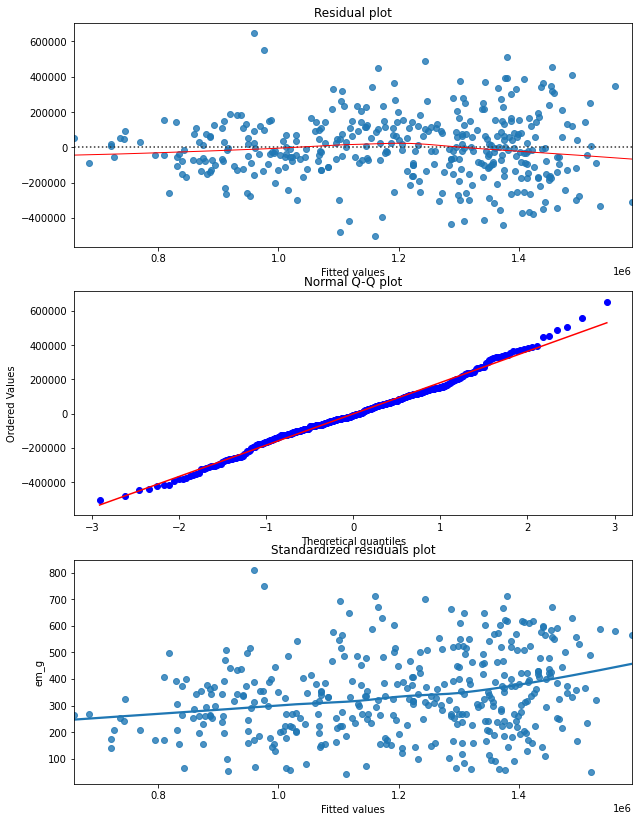

 26%|█████████████████████▍                                                            | 11/42 [00:09<00:31,  1.02s/it]

--------------------------------------------------
------------------------------------
삼양동
R squared : 0.33884694573551566
Valid set score :  0.25928337217419306
RMSE : 532564.2983031666


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


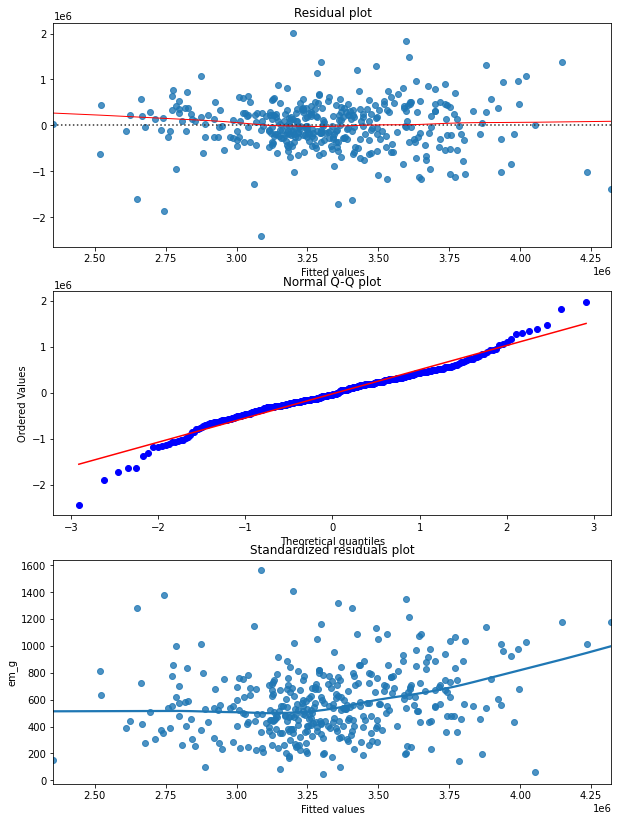

 29%|███████████████████████▍                                                          | 12/42 [00:09<00:27,  1.09it/s]

--------------------------------------------------
------------------------------------
서홍동
R squared : 0.24634151851378394
Valid set score :  0.20473096627008347
RMSE : 307674.62022130645


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


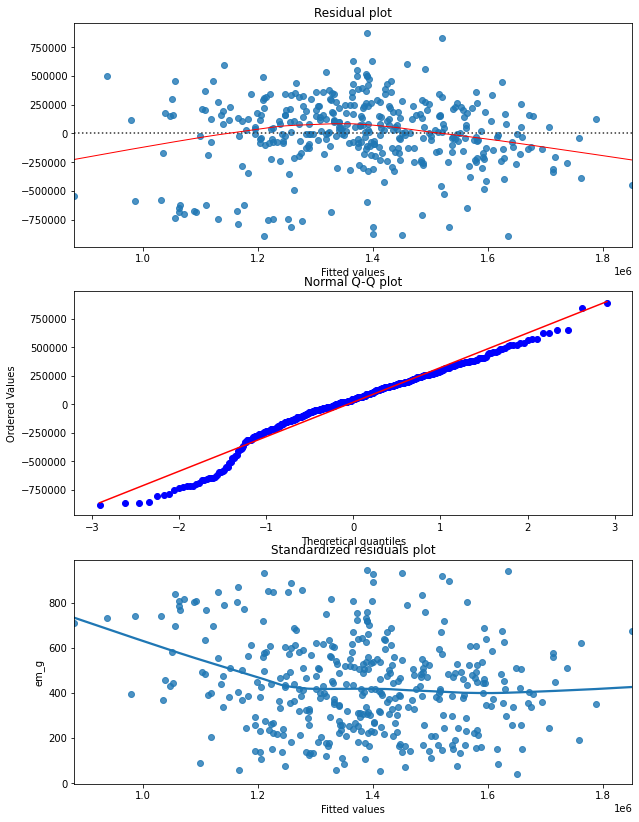

 31%|█████████████████████████▍                                                        | 13/42 [00:10<00:24,  1.18it/s]c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


--------------------------------------------------
------------------------------------
성산읍
R squared : 0.7629935147711518
Valid set score :  0.7255755663544247
RMSE : 390986.99615540914


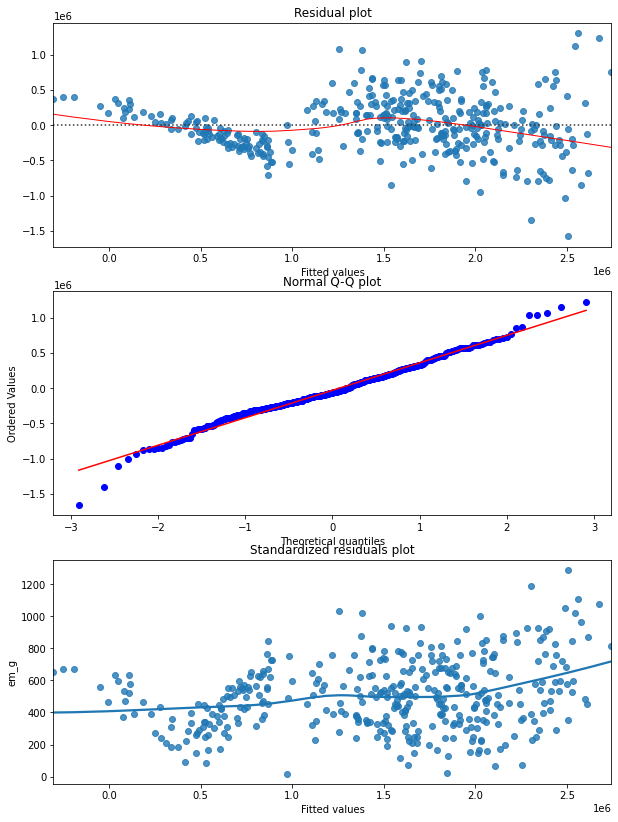

 33%|███████████████████████████▎                                                      | 14/42 [00:11<00:22,  1.26it/s]

--------------------------------------------------
------------------------------------
송산동
R squared : 0.3329140416298575
Valid set score :  0.3085494745300241
RMSE : 210174.9570072026


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


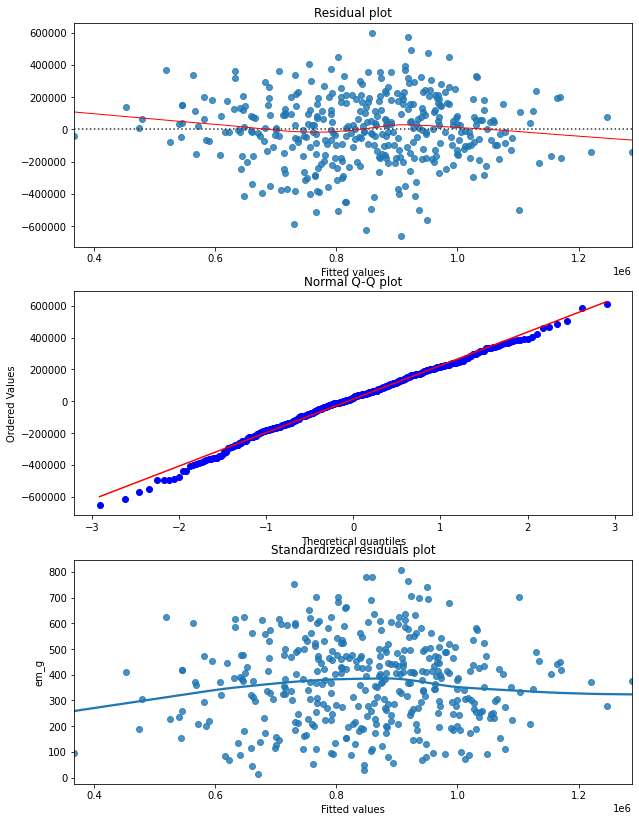

 36%|█████████████████████████████▎                                                    | 15/42 [00:11<00:20,  1.30it/s]

--------------------------------------------------
------------------------------------
아라동
R squared : 0.3368868842990609
Valid set score :  0.2520839935212018
RMSE : 641823.5986723182


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


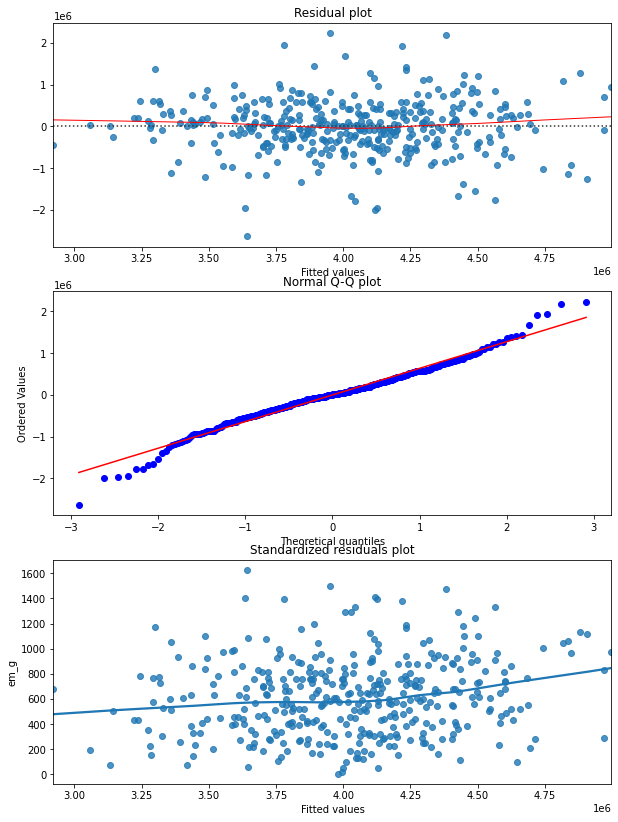

 38%|███████████████████████████████▏                                                  | 16/42 [00:12<00:19,  1.33it/s]

--------------------------------------------------
------------------------------------
안덕면
R squared : 0.8220803912053745
Valid set score :  0.8249983663828747
RMSE : 184998.28208116724


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


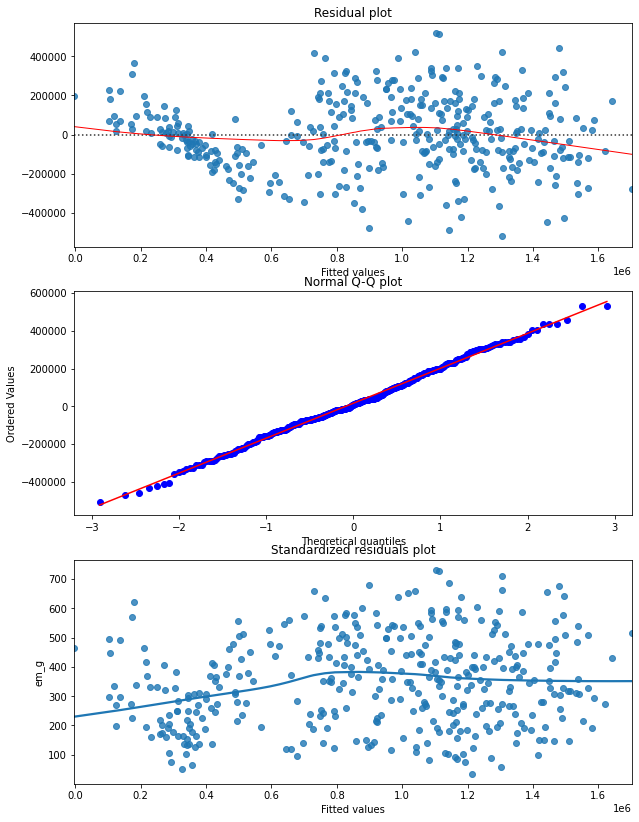

 40%|█████████████████████████████████▏                                                | 17/42 [00:13<00:19,  1.28it/s]

--------------------------------------------------
------------------------------------
애월읍
R squared : 0.883652141991048
Valid set score :  0.8724821273431527
RMSE : 470625.7650355785


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


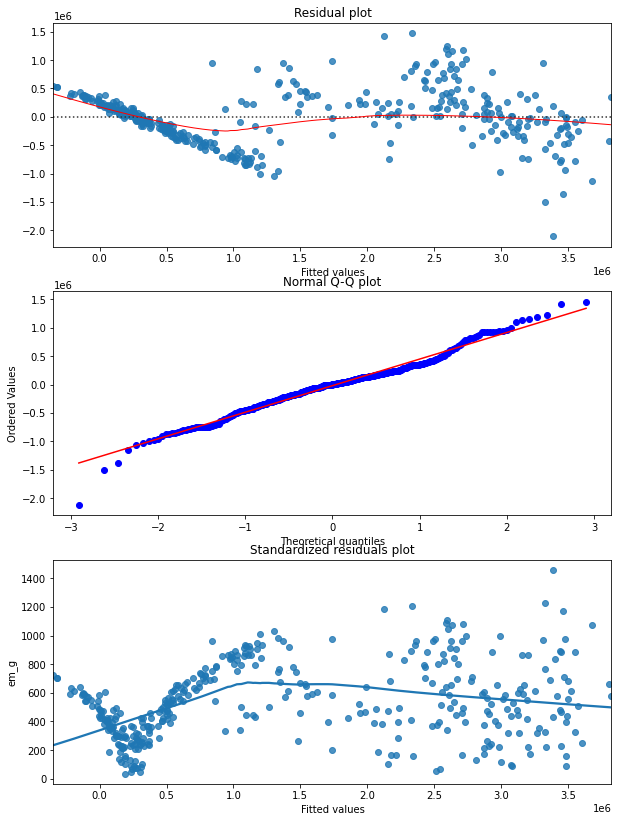

 43%|███████████████████████████████████▏                                              | 18/42 [00:14<00:18,  1.31it/s]

--------------------------------------------------
------------------------------------
연동
R squared : 0.32375187991022747
Valid set score :  0.27560653011586367
RMSE : 867636.0044687269


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


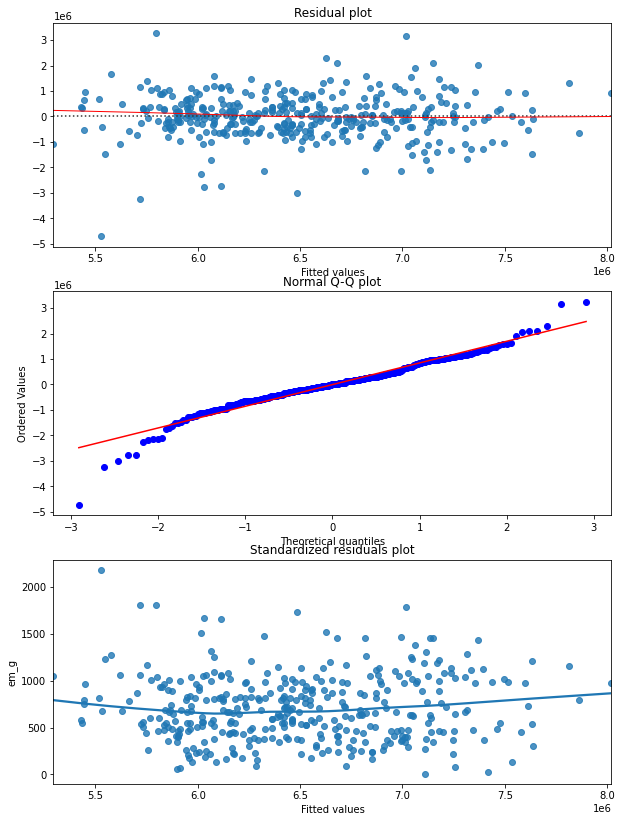

 45%|█████████████████████████████████████                                             | 19/42 [00:14<00:16,  1.36it/s]

--------------------------------------------------
------------------------------------
영천동
R squared : 0.3846691065431047
Valid set score :  0.3820958904963502
RMSE : 300524.5010153972


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


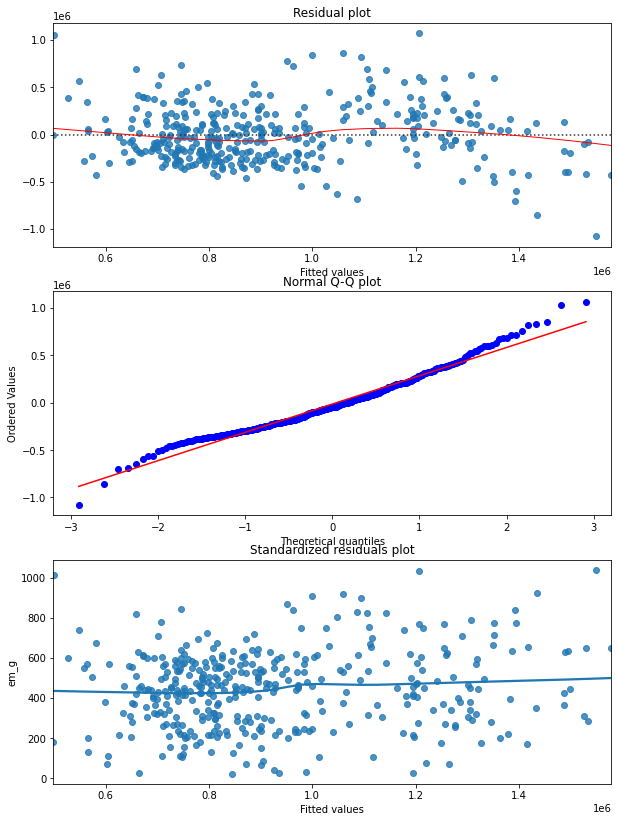

 48%|███████████████████████████████████████                                           | 20/42 [00:15<00:15,  1.41it/s]

--------------------------------------------------
------------------------------------
예래동
R squared : 0.30063075167241016
Valid set score :  0.27940307945246634
RMSE : 116162.17969977624


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


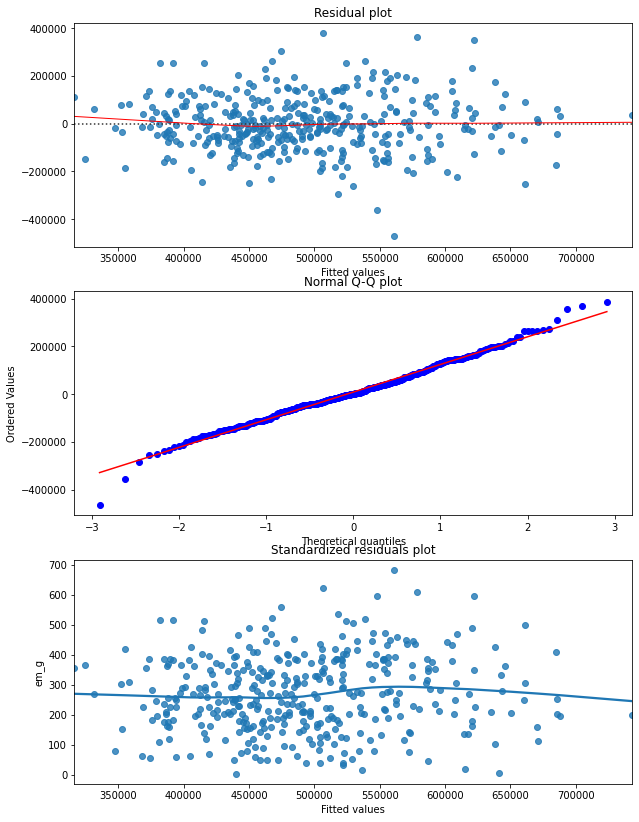

 50%|█████████████████████████████████████████                                         | 21/42 [00:16<00:14,  1.43it/s]

--------------------------------------------------
------------------------------------
오라동
R squared : 0.33643873162014915
Valid set score :  0.20303239793562777
RMSE : 304940.7979253174


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


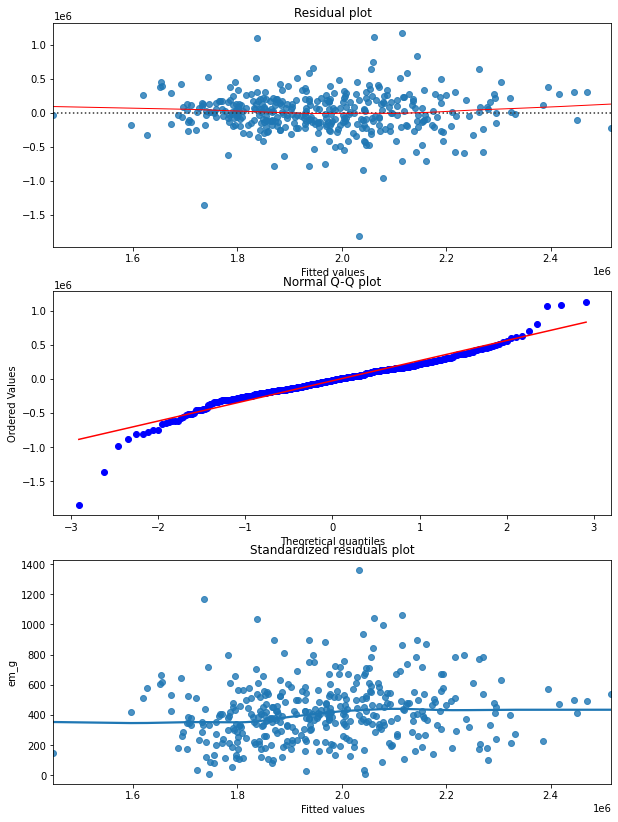

 52%|██████████████████████████████████████████▉                                       | 22/42 [00:16<00:13,  1.44it/s]

--------------------------------------------------
------------------------------------
외도동
R squared : 0.24358980844280753
Valid set score :  0.1970847143063602
RMSE : 469453.4170265026


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


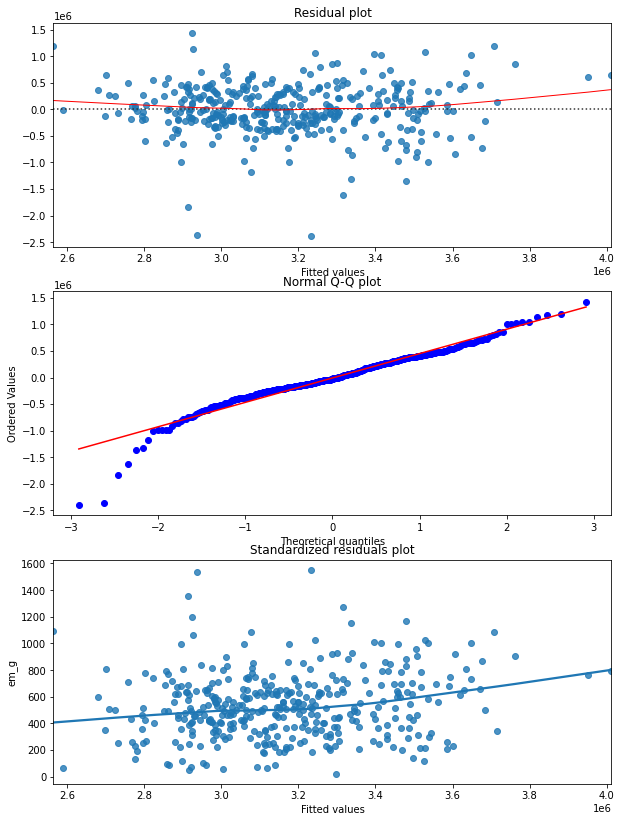

 55%|████████████████████████████████████████████▉                                     | 23/42 [00:17<00:13,  1.40it/s]

--------------------------------------------------
------------------------------------
용담1동
R squared : 0.5517816017380828
Valid set score :  0.41755706343087273
RMSE : 172747.06070408048


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


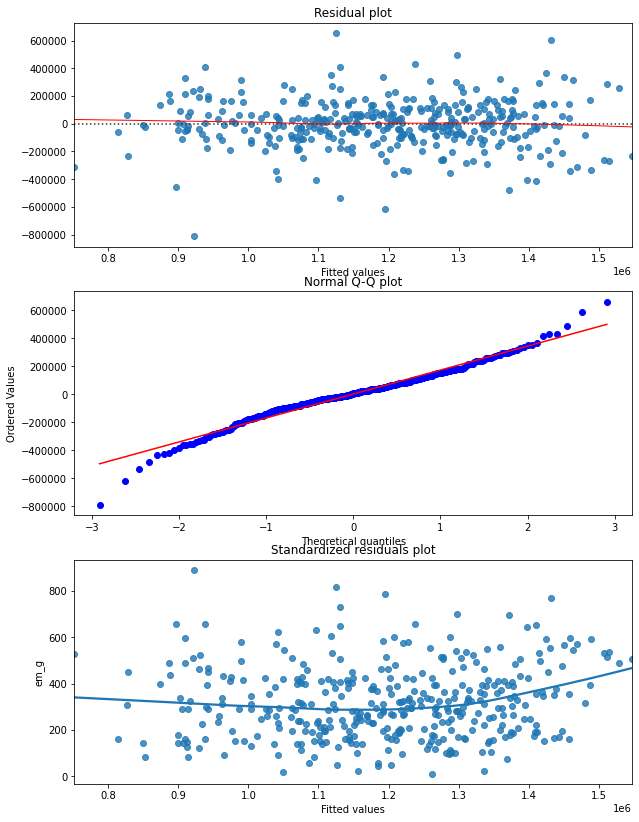

 57%|██████████████████████████████████████████████▊                                   | 24/42 [00:18<00:13,  1.34it/s]

--------------------------------------------------
------------------------------------
용담2동
R squared : 0.45833457471054995
Valid set score :  0.3129405276903673
RMSE : 326948.2038109828


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


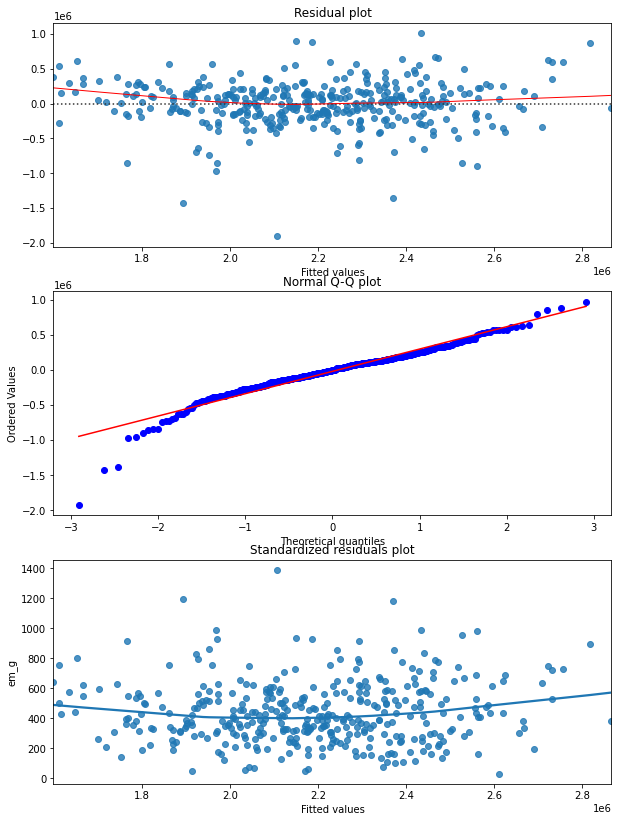

 60%|████████████████████████████████████████████████▊                                 | 25/42 [00:19<00:12,  1.35it/s]

--------------------------------------------------
------------------------------------
이도1동
R squared : 0.45657001937343145
Valid set score :  0.38485917755109234
RMSE : 233312.31968859484


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


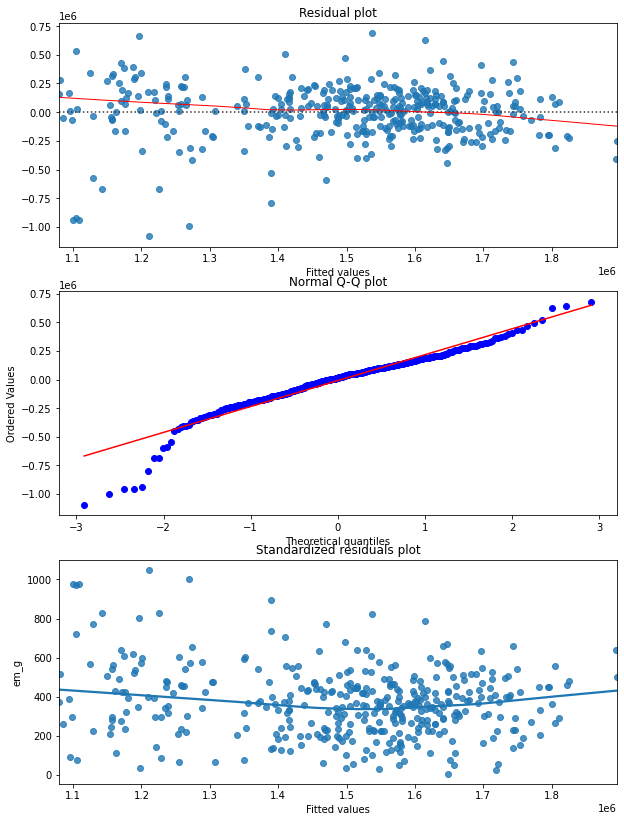

 62%|██████████████████████████████████████████████████▊                               | 26/42 [00:19<00:11,  1.38it/s]

--------------------------------------------------
------------------------------------
이도2동
R squared : 0.4237450169875733
Valid set score :  0.28015784352362016
RMSE : 1149240.0463844074


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


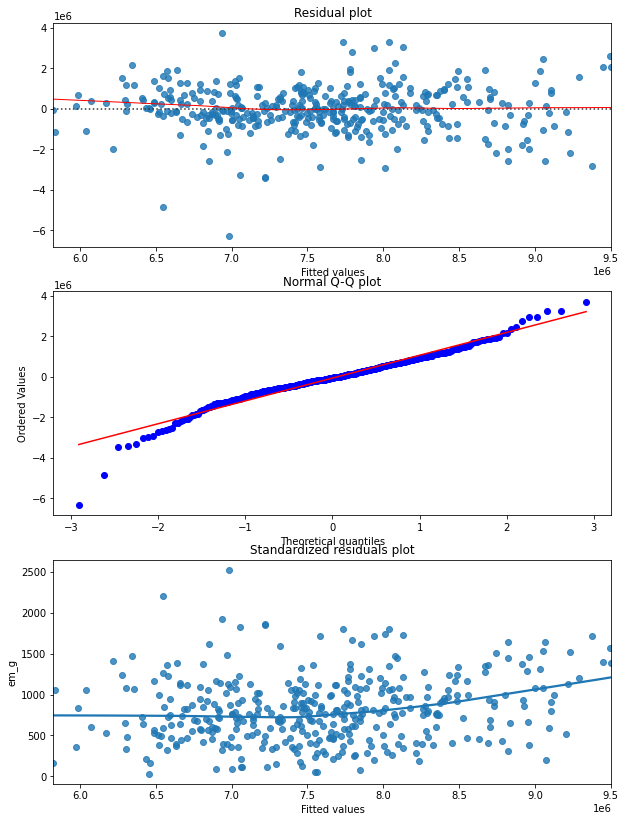

 64%|████████████████████████████████████████████████████▋                             | 27/42 [00:20<00:10,  1.40it/s]

--------------------------------------------------
------------------------------------
이호동
R squared : 0.29841707240214577
Valid set score :  0.25434857529362354
RMSE : 113300.06469943076


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


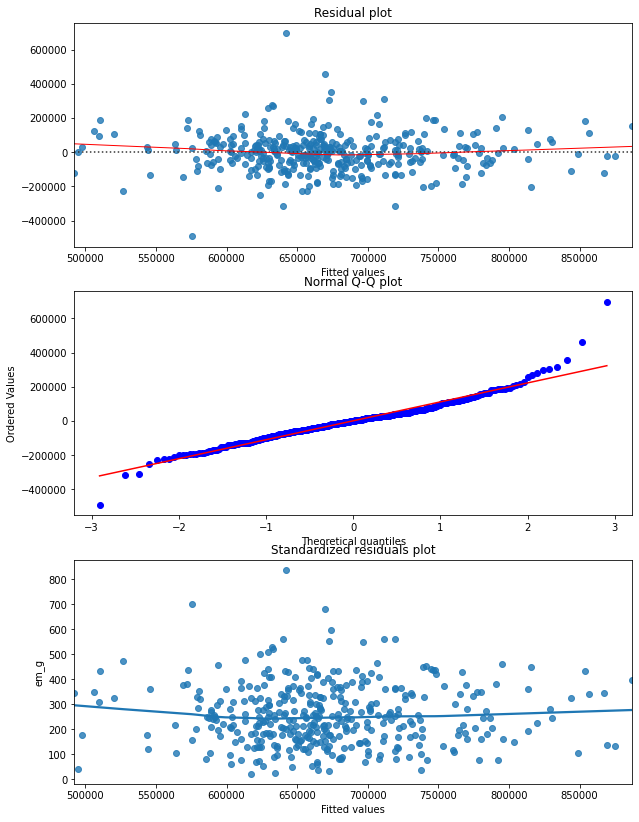

 67%|██████████████████████████████████████████████████████▋                           | 28/42 [00:21<00:09,  1.42it/s]

--------------------------------------------------
------------------------------------
일도1동
R squared : 0.2970509926402368
Valid set score :  0.2537410926267596
RMSE : 95744.85698314442


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


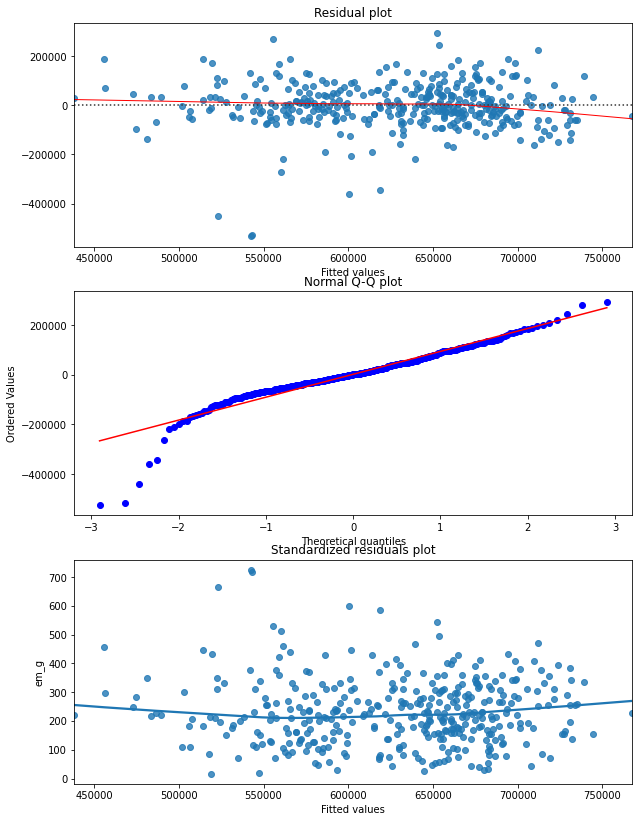

 69%|████████████████████████████████████████████████████████▌                         | 29/42 [00:21<00:08,  1.45it/s]

--------------------------------------------------
------------------------------------
일도2동
R squared : 0.43274119754463725
Valid set score :  0.3307636740416
RMSE : 831545.0710547226


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


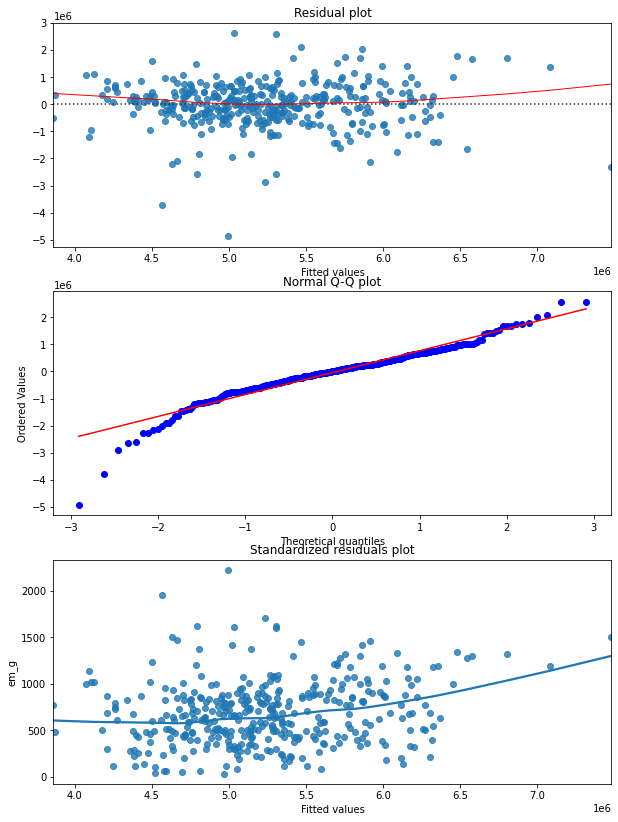

 71%|██████████████████████████████████████████████████████████▌                       | 30/42 [00:22<00:08,  1.36it/s]

--------------------------------------------------
------------------------------------
정방동
R squared : 0.25657532127484783
Valid set score :  0.16160599343776372
RMSE : 184659.71290312416


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


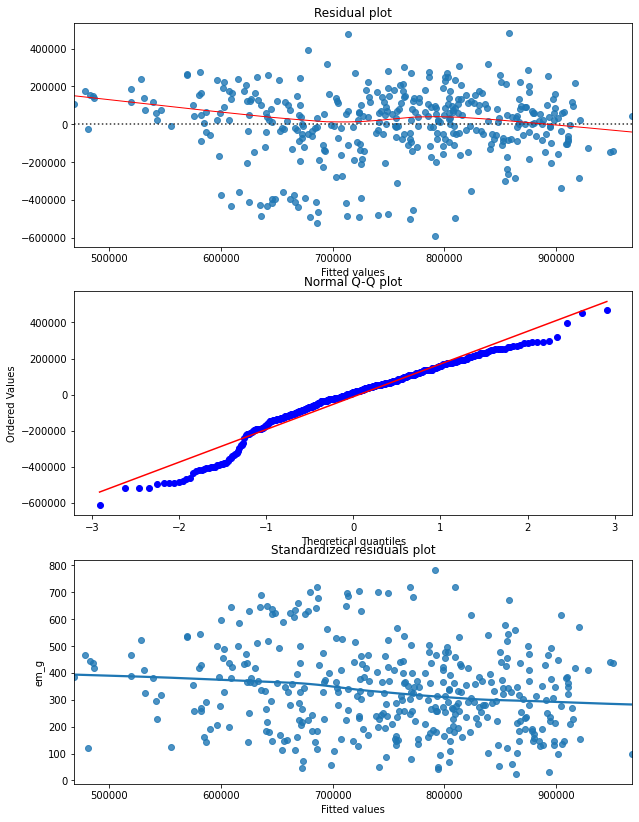

 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [00:23<00:08,  1.36it/s]

--------------------------------------------------
------------------------------------
중문동
R squared : 0.3848989176945945
Valid set score :  0.3649402284829153
RMSE : 352839.23982864193


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


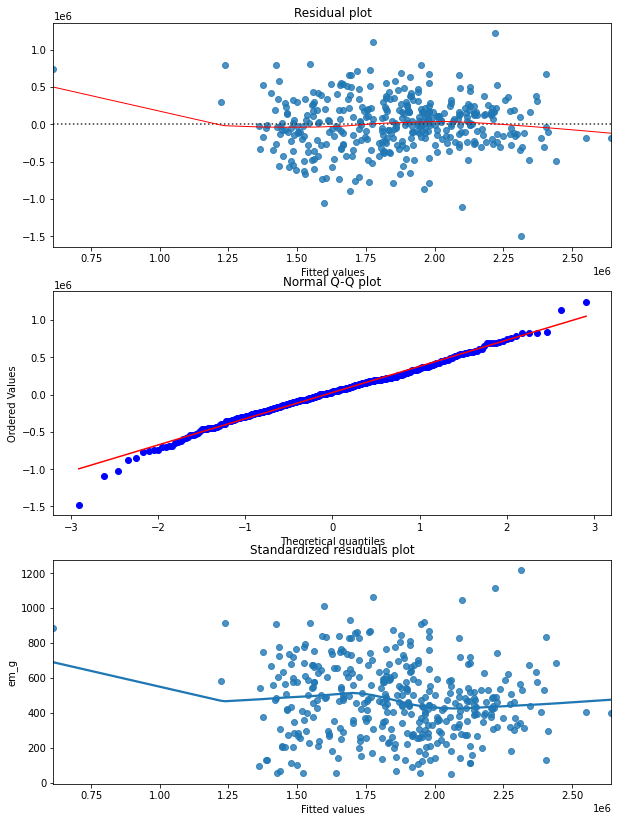

 76%|██████████████████████████████████████████████████████████████▍                   | 32/42 [00:24<00:07,  1.37it/s]

--------------------------------------------------
------------------------------------
중앙동
R squared : 0.1387664411272168
Valid set score :  0.04591486288938629
RMSE : 349093.4168414569


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


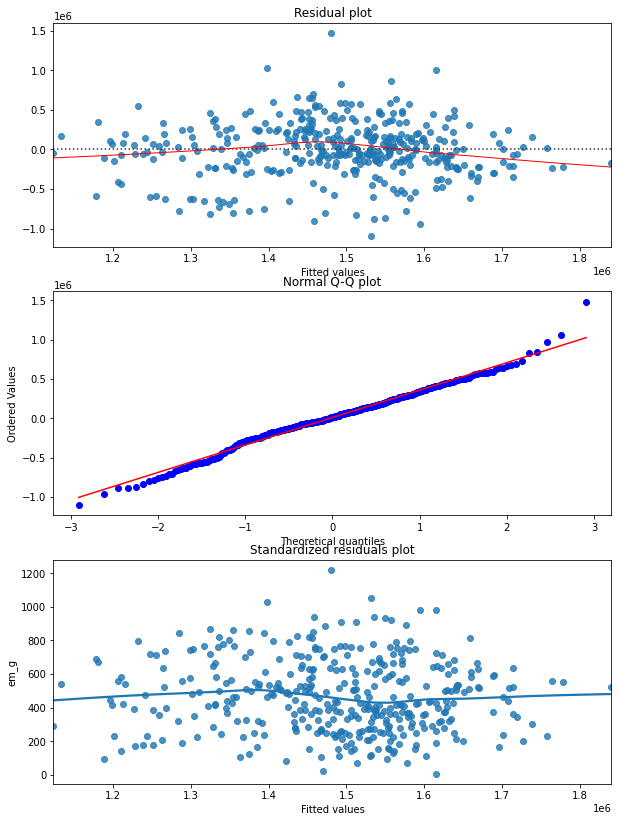

 79%|████████████████████████████████████████████████████████████████▍                 | 33/42 [00:24<00:06,  1.37it/s]

--------------------------------------------------
------------------------------------
천지동
R squared : 0.22604308234810677
Valid set score :  0.15482366132613123
RMSE : 304599.5157383949


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


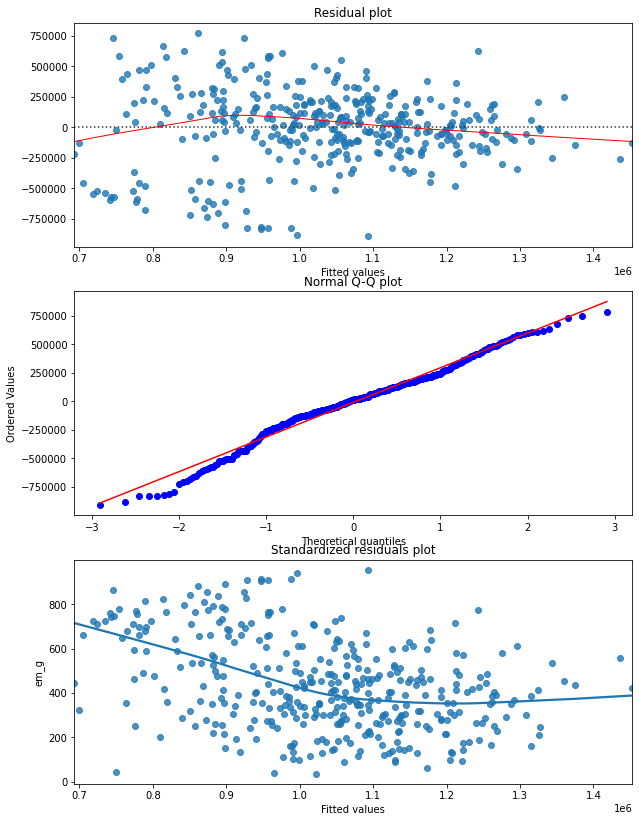

 81%|██████████████████████████████████████████████████████████████████▍               | 34/42 [00:25<00:06,  1.31it/s]

--------------------------------------------------
------------------------------------
표선면
R squared : 0.6040246137417685
Valid set score :  0.689957112214876
RMSE : 188375.46711325276


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


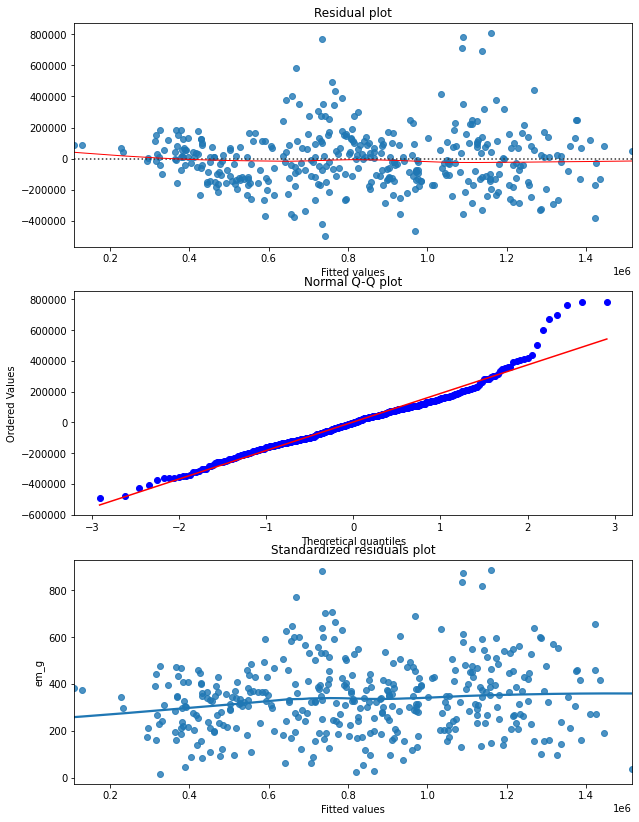

 83%|████████████████████████████████████████████████████████████████████▎             | 35/42 [00:26<00:05,  1.34it/s]

--------------------------------------------------
------------------------------------
화북동
R squared : 0.27306740382784467
Valid set score :  0.18585705569223432
RMSE : 568052.3652909563


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


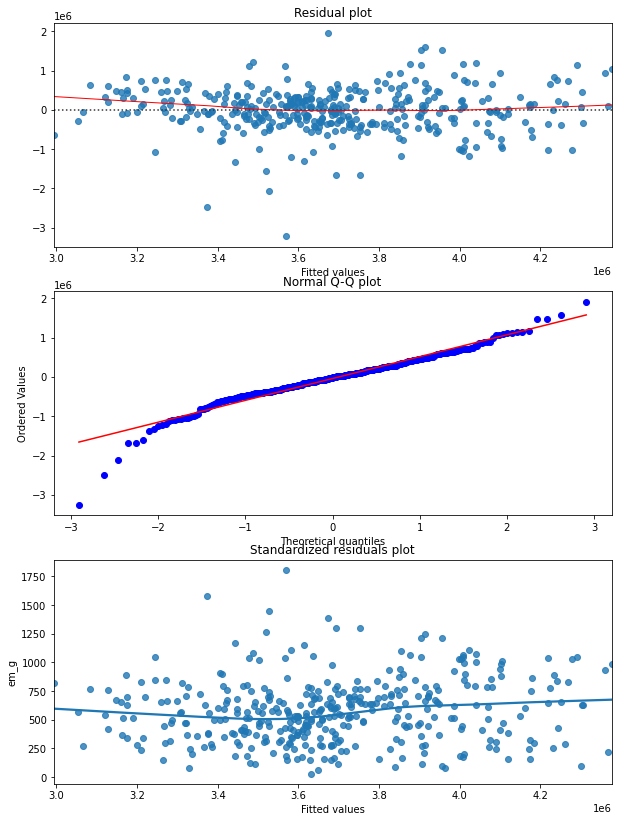

 86%|██████████████████████████████████████████████████████████████████████▎           | 36/42 [00:27<00:04,  1.37it/s]

--------------------------------------------------
------------------------------------
효돈동
R squared : 0.5188484812697414
Valid set score :  0.47422363356380837
RMSE : 230624.6166069864


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


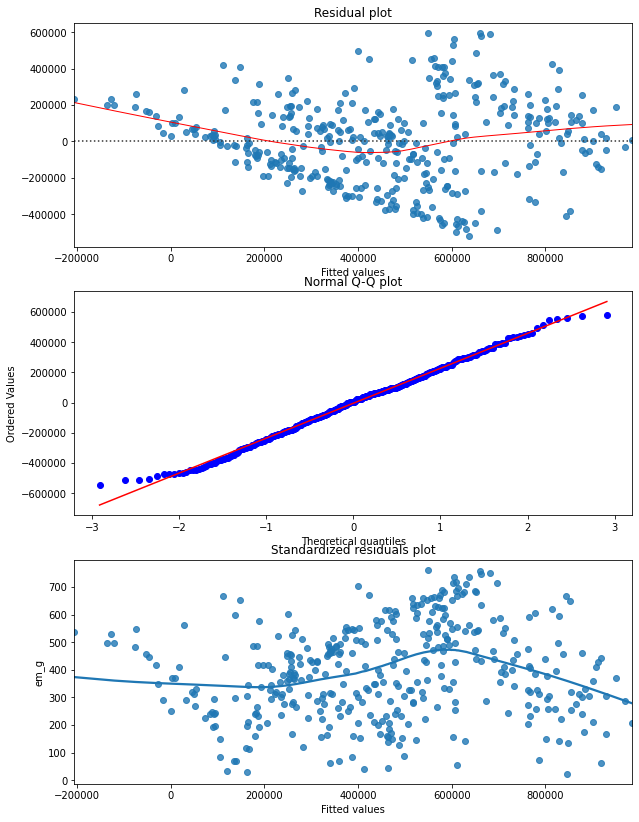

 88%|████████████████████████████████████████████████████████████████████████▏         | 37/42 [00:27<00:03,  1.33it/s]

--------------------------------------------------
------------------------------------
전체
R squared : 0.4133786093461851
Valid set score :  0.36465168438827256
RMSE : 10001120.65355344


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


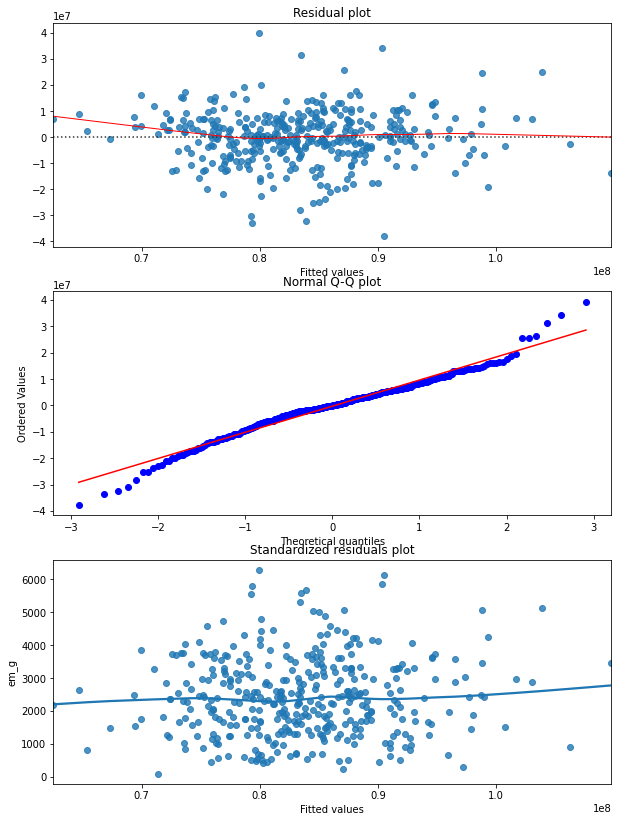

 90%|██████████████████████████████████████████████████████████████████████████▏       | 38/42 [00:28<00:02,  1.37it/s]

--------------------------------------------------
------------------------------------
조천읍
R squared : 0.715731396913029
Valid set score :  0.6585426726054233
RMSE : 328660.65160956455


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


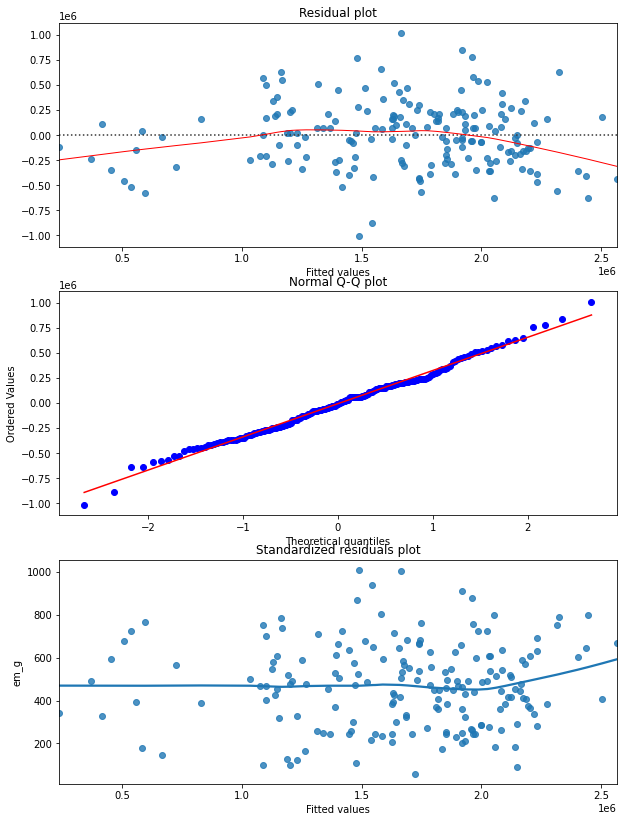

 93%|████████████████████████████████████████████████████████████████████████████▏     | 39/42 [00:29<00:02,  1.49it/s]

--------------------------------------------------
------------------------------------
구좌읍
R squared : 0.6941124154220193
Valid set score :  0.6554706740665053
RMSE : 173995.78378600575


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


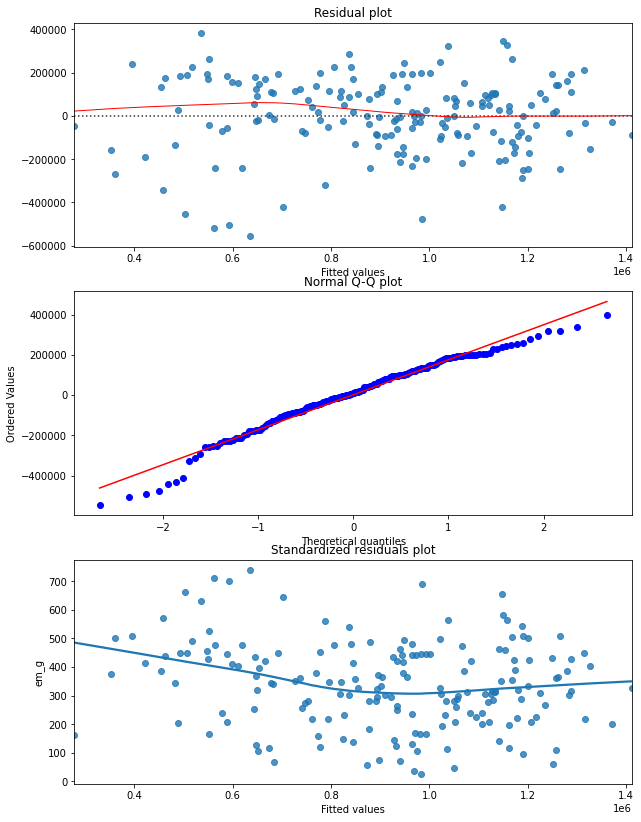

 95%|██████████████████████████████████████████████████████████████████████████████    | 40/42 [00:29<00:01,  1.59it/s]

--------------------------------------------------
------------------------------------
한림읍
R squared : 0.7177280047714578
Valid set score :  0.6674852636841997
RMSE : 336456.81135984755


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


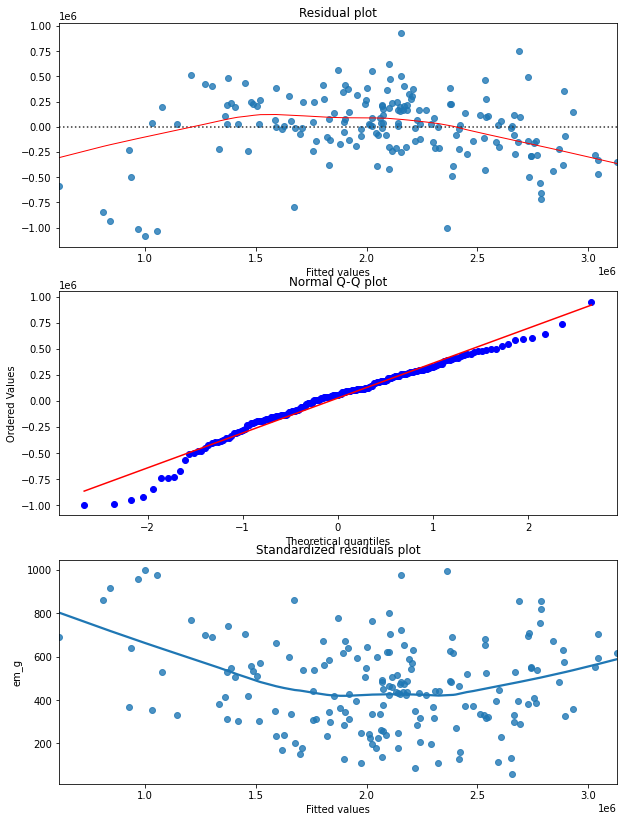

 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:30<00:00,  1.67it/s]

--------------------------------------------------
------------------------------------
한경면
R squared : 0.7310126590550627
Valid set score :  0.6352453674331645
RMSE : 124816.24673748881


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


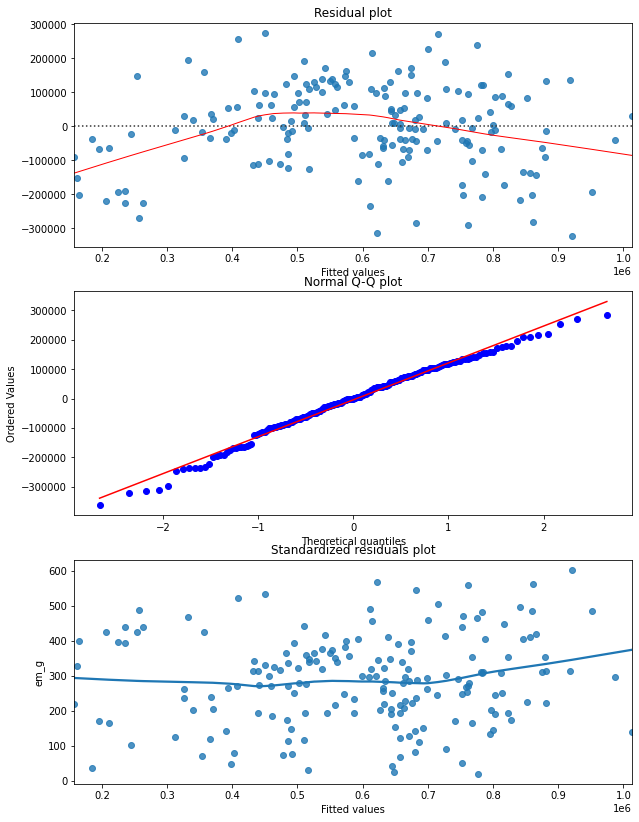

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:30<00:00,  1.36it/s]

--------------------------------------------------


In [39]:
for i in tqdm(train_set.emd_nm.unique()):
    print('------------------------------------')
    print(i)
    
    # 데이터셋 feature/train으로 분리 후 train/test셋으로 분리하기

    # for i in train_set.emd_nm.unique() :
    data = train_set[train_set.emd_nm == i]
    test_data = test_set[test_set.emd_nm == i]

    feature_df = data.drop(['em_g','emd_nm'],axis =1)
    X_test= test_data.drop( 'emd_nm', axis =1)
    target_df = data[['em_g']]

    # train/ valid로 분할
    X_train, X_valid, y_train, y_valid = train_test_split(feature_df, target_df, test_size = 0.3, random_state = 45)

    # 독립변수 scaling

    X_train_scaled, X_train_scaler = scaliing(X_train)
    X_valid_scaled = pd.DataFrame(X_train_scaler.transform(X_valid), index = X_valid.index, columns = X_valid.columns)
    #X_test
    
    # OLS
    valid_pred_y, train_r_squared, valid_set_score,  rmse , linreg = ols(X_train_scaled, y_train, X_valid_scaled, y_valid)
    
    # OLS result
    print('R squared :', train_r_squared)
    print('Valid set score : ' , valid_set_score)
    print('RMSE :', rmse)
    #plot
    plot_resd_assump(valid_pred_y, y_valid)

    print('--------------------------------------------------')

### 남원읍

In [40]:
i = train_set.emd_nm.unique()[1]

In [41]:
i

'남원읍'

In [42]:
# 데이터셋 feature/train으로 분리 후 train/test셋으로 분리하기

# for i in train_set.emd_nm.unique() :
data = train_set[train_set.emd_nm == i]
test_data = test_set[test_set.emd_nm == i]

feature_df = data.drop(['em_g','emd_nm'],axis =1)
X_test= test_data.drop( 'emd_nm', axis =1)
target_df = data[['em_g']]

# train/ valid로 분할
X_train, X_valid, y_train, y_valid = train_test_split(feature_df, target_df, test_size = 0.3, random_state = 45)


In [45]:
# 독립변수 scaling

def scaliing(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    dataframe_scaled= pd.DataFrame(data_scaled, index = data.index , columns = data.columns)
    
    return dataframe_scaled, scaler

X_train_scaled, X_train_scaler = scaliing(X_train)
X_valid_scaled = pd.DataFrame(X_train_scaler.transform(X_valid), index = X_valid.index, columns = X_valid.columns)
#X_test

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'date'}>],
       [<AxesSubplot:title={'center':'total_pop'}>,
        <AxesSubplot:title={'center':'제주_resd_ratio'}>,
        <AxesSubplot:title={'center':'제주_resd_pop'}>],
       [<AxesSubplot:title={'center':'visit_ratio'}>,
        <AxesSubplot:title={'center':'card_use_cnt'}>,
        <AxesSubplot:title={'center':'delivery_per_cnt'}>],
       [<AxesSubplot:title={'center':'market_per_cnt'}>,
        <AxesSubplot:title={'center':'frgn_ratio'}>,
        <AxesSubplot:title={'center':'youth_ratio'}>]], dtype=object)

c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)


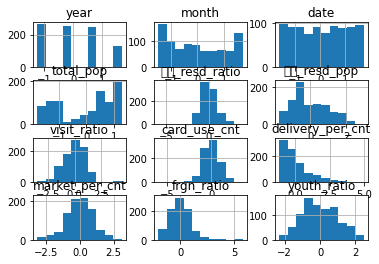

In [46]:
X_train_scaled.hist()

In [47]:
# Ordinary Least Sqaure regression
def ols(train_x, train_y, valid_x, valid_y):
    linreg = LinearRegression(n_jobs=-1)
    linreg_fit = linreg.fit(train_x, train_y)
    pred = linreg.predict(valid_x)
    
    r_squared = linreg.score(train_x, train_y)
    valid_set_score = linreg.score(valid_x, valid_y)
    rmse = np.sqrt(np.mean((pred-valid_y).values**2))
    
    return pred, r_squared, valid_set_score , rmse, linreg

valid_pred_y, train_r_squared, valid_set_score,  rmse , linreg = ols(X_train_scaled, y_train, X_valid_scaled, y_valid)

In [48]:
# OLS result
print('R squared :', train_r_squared)
print('Valid set score : ' , valid_set_score)
print('RMSE :', rmse)

R squared : 0.37551943224268924
Valid set score :  0.35853595143706707
RMSE : 384622.37764066487


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


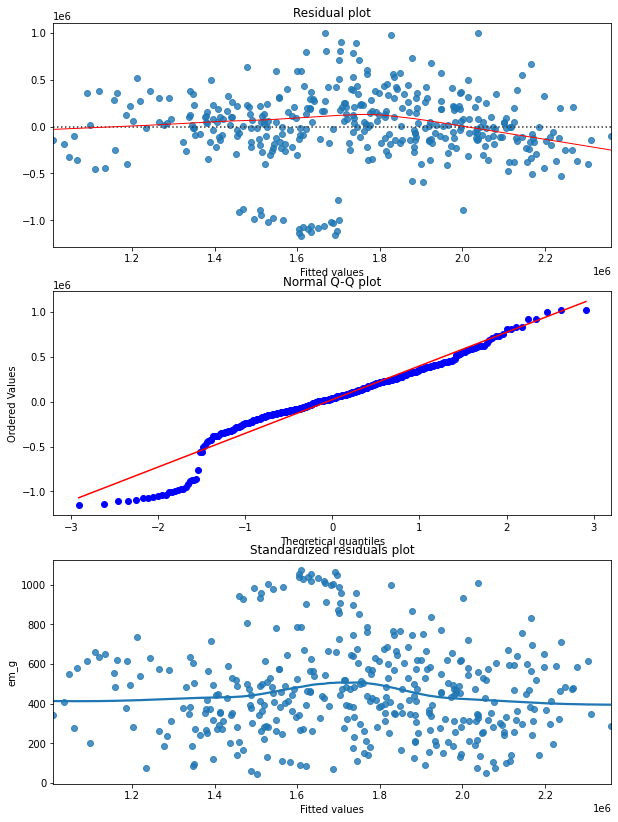

In [36]:
plot_resd_assump(valid_pred_y, y_valid)

In [50]:
# coef 확인

coef_table = pd.DataFrame({'variable': X_train_scaled.columns , 'coef': np.abs(linreg.coef_.reshape(-1))}).sort_values('coef')
coef_table

,variable,coef
2,date,6349.836966
11,youth_ratio,14937.830917
10,frgn_ratio,17097.818796
3,total_pop,17591.176481
9,market_per_cnt,26407.440211
6,visit_ratio,26609.526861
4,제주_resd_ratio,34020.550686
5,제주_resd_pop,55063.134313
7,card_use_cnt,88583.496610
1,month,100635.917571


In [52]:
# vif 확인

#home
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif["features"] = X_train_scaled.columns
vif

,VIF Factor,features
0,10.874251,year
1,1.574457,month
2,1.285254,date
3,6.801439,total_pop
4,4.110066,제주_resd_ratio
5,8.886106,제주_resd_pop
6,5.295187,visit_ratio
7,1.393117,card_use_cnt
8,2.925229,delivery_per_cnt
9,1.138435,market_per_cnt
